In [1]:
import argparse
import os
import sys
import psutil
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#from datetime import datetime
import math
from IPython.display import display
from multiprocessing import cpu_count,Pool 
import multiprocessing
from joblib import Parallel, delayed
#from orderedset import OrderedSet

In [2]:
data_Set = pd.read_hdf('../../data_set.h5',key='DS_new')

In [3]:
data_Set.duration.mean()

276.4785361130656

In [4]:
data_Set.duration.quantile(.985)

360.0

In [5]:
data_histo = data_Set.copy()#[np.abs(long_events.duration-long_events.duration.mean())<=(1000000000000*long_events.duration.std())] 
#data_histo.duration

#plt.savefig('long_event_merged_du_dist_'+str(effective_days)+'.png')

In [6]:
a=[]
for i in range(1,25):
    a.append(2**i)
#a

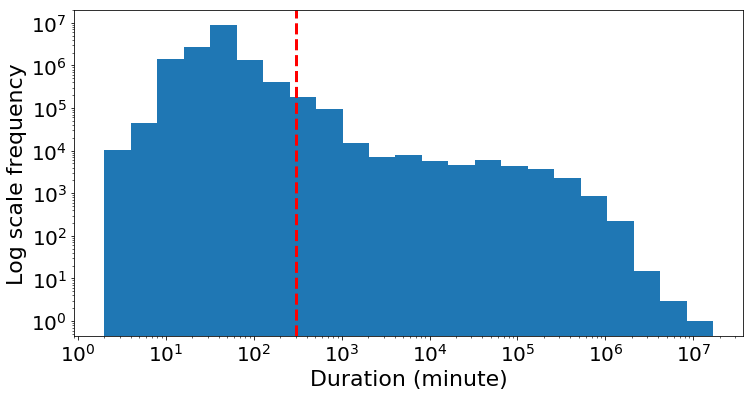

In [17]:
#a = np.arange(10,10000,1)
"""
b = np.arange(10,100,5)
c = np.arange(100,1000,10)
d = np.arange(1000,10000,100)
e = np.arange(10000,100000,200)
"""
bins = a#np.concatenate((a, b,c,d,e), axis=0)
#print (bins)

font= {'size': 20}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(12, 6))
_, bins, patches = plt.hist(data_Set.duration,#[np.clip(data_Set.duration, bins[0], bins[-1])],
                                bins=bins)
#xlabels = [str(b) for b in bins[1:]]
#xlabels[-1] += '+'
#ax.set_yscale('log')
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposy='clip')
plt.xlabel('Duration (minute)', size=22)
plt.ylabel('Log scale frequency', size=22)
#plt.title(Y_title+" period")
#N_labels = len(xlabels)
#plt.xlim([0, 8700])
#plt.xticks(300 * np.arange(N_labels) + 20)
#ax.set_xticklabels(xlabels)
plt.axvline(300, color='red', linestyle='dashed', linewidth=3)
#fig.tight_layout()
fig.savefig("timedis.pdf", format='pdf',bbox_inches='tight')
plt.show()
#temp = data_Set[(data_Set.duration<300) & (data_Set.duration>=120)]
#temp.shape

In [71]:
ln = data_Set[(data_Set.duration>=300)]
len(ln[ln.duration <= 21*24*60])/len(ln)

0.9398827863362358

[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875
 900 925 950 975]


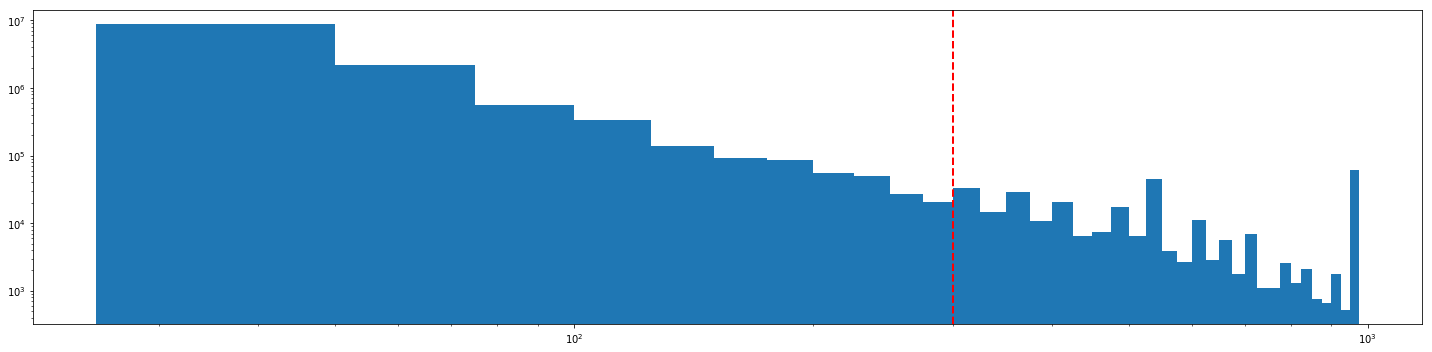

In [44]:
a = np.arange(0,1000,25)
"""
b = np.arange(10,100,5)
c = np.arange(100,1000,10)
d = np.arange(1000,10000,100)
e = np.arange(10000,100000,200)
"""
bins = a#np.concatenate((a, b,c,d,e), axis=0)
print (bins)


fig, ax = plt.subplots(figsize=(20, 5))
_, bins, patches = plt.hist([np.clip(data_Set.duration, bins[0], bins[-1])],
                                bins=bins)
#xlabels = [str(b) for b in bins[1:]]
#xlabels[-1] += '+'
#ax.set_yscale('log')
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposy='clip')
#N_labels = len(xlabels)
#plt.xlim([0, 8700])
#plt.xticks(300 * np.arange(N_labels) + 20)
#ax.set_xticklabels(xlabels)
plt.axvline(300, color='red', linestyle='dashed', linewidth=2)
fig.tight_layout()
plt.show()
#temp = data_Set[(data_Set.duration<300) & (data_Set.duration>=120)]
#temp.shape

[  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950]


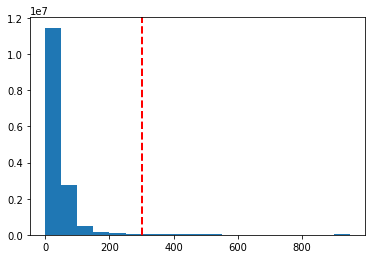

In [31]:
a = np.arange(0,1000,50)
"""
b = np.arange(10,100,5)
c = np.arange(100,1000,10)
d = np.arange(1000,10000,100)
e = np.arange(10000,100000,200)
"""
bins = a#np.concatenate((a, b,c,d,e), axis=0)
print (bins)


fig, ax = plt.subplots()
_, bins, patches = plt.hist([np.clip(data_Set.duration, bins[0], bins[-1])],
                                bins=bins)
#xlabels = [str(b) for b in bins[1:]]
#xlabels[-1] += '+'
#ax.set_yscale('log')
#plt.yscale('log', nonposy='clip')
#plt.xscale('log', nonposy='clip')
#N_labels = len(xlabels)
#plt.xlim([0, 8700])
#plt.xticks(300 * np.arange(N_labels) + 20)
#ax.set_xticklabels(xlabels)
plt.axvline(300, color='red', linestyle='dashed', linewidth=2)
#fig.tight_layout()
plt.show()
#temp = data_Set[(data_Set.duration<300) & (data_Set.duration>=120)]
#temp.shape

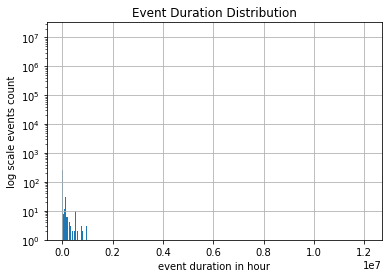

In [110]:
fig, ax = plt.subplots()
#count, division = np.histogram(data_Set.duration)
#series.hist(bins=division)
data_Set.duration.hist(ax=ax, bins=100812,bottom=1)
ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
count, division = np.histogram(data_histo.duration)
#series.hist(bins=division)
data_histo.duration.hist(ax=ax, bins=division)
#ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [92]:
division

array([        0.        ,   1209753.45666667,   2419506.91333333,
         3629260.37      ,   4839013.82666667,   6048767.28333333,
         7258520.74      ,   8468274.19666667,   9678027.65333333,
        10887781.11      ,  12097534.56666667])

In [93]:
count

array([15324943,      133,        9,        2,        1,        1,
              0,        0,        0,        1])

In [94]:
data_histo=data_histo[data_histo.duration<1209753]

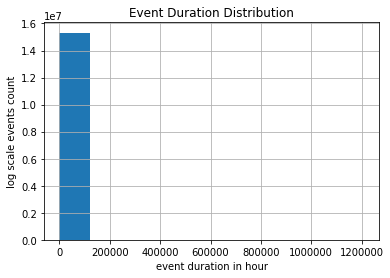

In [95]:
fig, ax = plt.subplots()
count, division = np.histogram(data_histo.duration)
#series.hist(bins=division)
data_histo.duration.hist(ax=ax, bins=division)
#ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [96]:
division

array([       0.,   120870.,   241740.,   362610.,   483480.,   604350.,
         725220.,   846090.,   966960.,  1087830.,  1208700.])

In [97]:
data_histo=data_histo[data_histo.duration<120870]

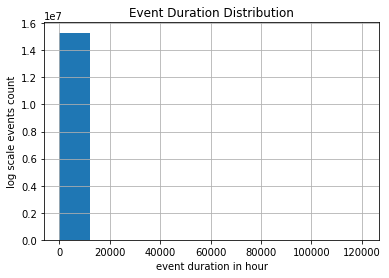

In [98]:
fig, ax = plt.subplots()
count, division = np.histogram(data_histo.duration)
#series.hist(bins=division)
data_histo.duration.hist(ax=ax, bins=division)
#ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [99]:
division

array([      0.        ,   12074.39666667,   24148.79333333,
         36223.19      ,   48297.58666667,   60371.98333333,
         72446.38      ,   84520.77666667,   96595.17333333,
        108669.57      ,  120743.96666667])

In [100]:
data_histo=data_histo[data_histo.duration<12074]

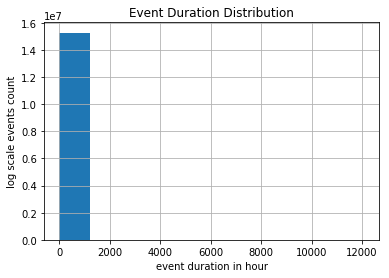

In [101]:
fig, ax = plt.subplots()
count, division = np.histogram(data_histo.duration)
#series.hist(bins=division)
data_histo.duration.hist(ax=ax, bins=division)
#ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [102]:
division

array([     0.   ,   1207.385,   2414.77 ,   3622.155,   4829.54 ,
         6036.925,   7244.31 ,   8451.695,   9659.08 ,  10866.465,
        12073.85 ])

In [103]:
data_histo=data_histo[data_histo.duration<1207]

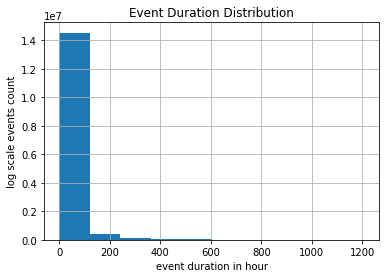

In [104]:
fig, ax = plt.subplots()
count, division = np.histogram(data_histo.duration)
#series.hist(bins=division)
data_histo.duration.hist(ax=ax, bins=division)
#ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [105]:
division

array([    0. ,   120.6,   241.2,   361.8,   482.4,   603. ,   723.6,
         844.2,   964.8,  1085.4,  1206. ])

In [106]:
data_histo=data_histo[data_histo.duration<120]

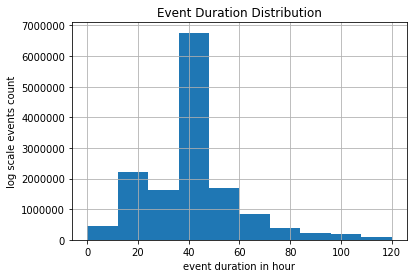

In [107]:
fig, ax = plt.subplots()
count, division = np.histogram(data_histo.duration)
#series.hist(bins=division)
data_histo.duration.hist(ax=ax, bins=division)
#ax.set_yscale('log')
plt.xlabel('event duration in hour')
plt.ylabel('log scale events count')
plt.title('Event Duration Distribution')
plt.show()

In [108]:
data_histo

,EventId,Type,RefinedType_,StartTime,EndTime,LocationLat,LocationLng,Distance(mi),AirportCode,Number,Street,Side,City,County,State,ZipCode,RefinedType,duration
0,W-307,W,rain-light,2016-08-01 00:16:00,2016-08-01 00:56:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,40.000000
1,W-308,W,rain-light,2016-08-01 01:16:00,2016-08-01 01:36:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
2,W-309,W,rain-light,2016-08-01 01:56:00,2016-08-01 02:16:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
3,W-310,W,rain-light,2016-08-01 02:36:00,2016-08-01 02:56:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
4,W-311,W,rain-light,2016-08-01 04:36:00,2016-08-01 04:56:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
5,W-312,W,rain-light,2016-08-01 05:16:00,2016-08-01 05:36:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
6,W-313,W,rain-light,2016-08-01 06:16:00,2016-08-01 06:36:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
7,W-314,W,rain-light,2016-08-01 23:56:00,2016-08-02 00:16:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
8,W-315,W,rain-light,2016-08-03 00:16:00,2016-08-03 01:16:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,60.000000
9,W-316,W,rain-light,2016-08-03 02:16:00,2016-08-03 02:36:00,NaN,NaN,NaN,K04V,NaN,NaN,NaN,Saguache,NaN,CO,NaN,rain,20.000000
